# Week 3

## Dictionaries 

- Dictionaries are used to store data values in key:value pairs.

- A dictionary is a collection which is ordered*, changeable and do not allow duplicates.

- More on https://www.w3schools.com/python/python_dictionaries.asp

In [1]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


In [2]:
# Print the "brand" value of the dictionary:
print(thisdict["brand"])

Ford





## Getting Data from an API

- API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you’re using an API.


### REST APIs

Most of the time we've been finding datasets, we've accessed them whole, as finished `.csv` files for Excel sheets. 

However, sometimes that lovely data exists on a server somewhere else and instead of giving us access to the whole thing, we can make requests for specific pieces of data 

This is useful when 

* The dataset is a huge database we dont have space / desire to keep 

* We want to keep getting new up-to-date data 

An **API** or **Application Programming Interface**, describes the entry points a programming library or service has made available to us. 

Specifically a **REST API** is a type of online service that we can access to receiver (and send) data. 


### HTTP Requests 

``HTTP Requests`` are what we will use to query an API for data. Here, we point to a specific `URL`, and give some extra information about. 

1. The type of action we are doing (e.g. getting data, sending data, deleting data)

2. Some additional parameters (e.g. authorisation, specific queries etc...)


We then get a response that tells us whether our request was successful and hopefully, the information we requested.

Whilst there are several types of request, we will be looking at the ``GET`` request, where we ask for some information from the API. 

For more detailed view you can check the always excellent [W3Schools](https://www.w3schools.com/whatis/whatis_http.asp), 

### Python ``requests`` Library

``requests`` is a Python library we'll use to help us make ``HTTP Requests``, and to examine the responses. 



Requests is an elegant and simple HTTP library for Python. It “is an application-layer protocol for transmitting hypermedia documents, such as HTML. It was designed for communication between web browsers and web servers”
So, requests is a package that is going to help us communicate between our browser and a web server somewhere that is storing data we are interested in. 


- Coronavirus Covid-19 API - DOCUMENTATION
https://documenter.getpostman.com/view/10808728/SzS8rjbc

### Installing Requests 

In [ ]:
# Need to only be run once per environment. No need to run it again in every project.

import sys
!{sys.executable} -m pip install requests

### Importing and Running Requests 

In [33]:
import requests
import pandas as pd

In [34]:
url = 'https://api.covid19api.com/summary'

In [35]:
# Using the requests package to make a GET request from this API endpoint.
r = requests.get(url)

What does <Response [200]> mean? That the request has succeeded.

In [36]:
r

<Response [200]>

In [37]:
r.status_code

200

### JSON 

The majority of information passed between **APIs** is in a human-readable dictionary format called ``JSON``. 

From [W3Schools](https://www.w3schools.com/js/js_json_intro.asp)

```
When exchanging data between a browser and a server, the data can only be text.

JSON is text, and we can convert any JavaScript object into JSON, and send JSON to the server.

We can also convert any JSON received from the server into JavaScript objects.

This way we can work with the data as JavaScript objects, with no complicated parsing and translations.
```

So this means we can get back a string which we turn into a **Dictionary**

Refresher: A Dictionary is a type of collection in Python where we use **keys** (often strings) instead of **indexes** to access the items (as we would with arrays).

You can a spot dictionary because it uses a `{}` instead of `[]`.

``
{
"key1":0,
"key2":"value2",
"key3":[1,2,3,4]
}
``

Each item in the JSON dictionary can be 

* Text

* A number

* An array

**OR**

* Another Dictionary

So lets look at the response as text, hard to make sense right?

In [38]:
# To see the data returned 
r.text

'{"ID":"2f352fe5-d58f-46d2-99a2-6182de8e59a8","Message":"","Global":{"NewConfirmed":224924,"TotalConfirmed":533787388,"NewDeaths":696,"TotalDeaths":6304011,"NewRecovered":0,"TotalRecovered":0,"Date":"2022-06-13T05:28:15.704Z"},"Countries":[{"ID":"48dfed97-2334-498c-b1bb-02c96e2317fd","Country":"Afghanistan","CountryCode":"AF","Slug":"afghanistan","NewConfirmed":0,"TotalConfirmed":180864,"NewDeaths":0,"TotalDeaths":7709,"NewRecovered":0,"TotalRecovered":0,"Date":"2022-06-13T05:28:15.704Z","Premium":{}},{"ID":"644964b7-f36c-4790-a89e-e219e8e6436d","Country":"Albania","CountryCode":"AL","Slug":"albania","NewConfirmed":41,"TotalConfirmed":276731,"NewDeaths":0,"TotalDeaths":3497,"NewRecovered":0,"TotalRecovered":0,"Date":"2022-06-13T05:28:15.704Z","Premium":{}},{"ID":"9a9aab62-9a41-4e2f-a892-742b288720bf","Country":"Algeria","CountryCode":"DZ","Slug":"algeria","NewConfirmed":2,"TotalConfirmed":265927,"NewDeaths":0,"TotalDeaths":6875,"NewRecovered":0,"TotalRecovered":0,"Date":"2022-06-13T05:

We will now use a method called json() to extract the json-structured data from the request 'r'

In [39]:
json = r.json()

In [40]:
# .keys() is a method of returning keys of a dictionary 
# More on https://www.w3schools.com/python/ref_dictionary_keys.asp

json.keys()

dict_keys(['ID', 'Message', 'Global', 'Countries', 'Date'])

In [41]:
json['Global']

{'NewConfirmed': 224924,
 'TotalConfirmed': 533787388,
 'NewDeaths': 696,
 'TotalDeaths': 6304011,
 'NewRecovered': 0,
 'TotalRecovered': 0,
 'Date': '2022-06-13T05:28:15.704Z'}

In [42]:
json['Countries']

[{'ID': '48dfed97-2334-498c-b1bb-02c96e2317fd',
  'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Slug': 'afghanistan',
  'NewConfirmed': 0,
  'TotalConfirmed': 180864,
  'NewDeaths': 0,
  'TotalDeaths': 7709,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2022-06-13T05:28:15.704Z',
  'Premium': {}},
 {'ID': '644964b7-f36c-4790-a89e-e219e8e6436d',
  'Country': 'Albania',
  'CountryCode': 'AL',
  'Slug': 'albania',
  'NewConfirmed': 41,
  'TotalConfirmed': 276731,
  'NewDeaths': 0,
  'TotalDeaths': 3497,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2022-06-13T05:28:15.704Z',
  'Premium': {}},
 {'ID': '9a9aab62-9a41-4e2f-a892-742b288720bf',
  'Country': 'Algeria',
  'CountryCode': 'DZ',
  'Slug': 'algeria',
  'NewConfirmed': 2,
  'TotalConfirmed': 265927,
  'NewDeaths': 0,
  'TotalDeaths': 6875,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2022-06-13T05:28:15.704Z',
  'Premium': {}},
 {'ID': 'bbc359e2-4baf-4d5a-95be-a23ae10905e4',
  'Country': 'Andorra',
 

In [43]:
type(json['Global'])

dict

In [44]:
type(json['Countries'])

list

In [45]:
type(json['Date'])

str

In [46]:
# Countires is a list of dictionaries so let's explore further 
json['Countries'][0]

{'ID': '48dfed97-2334-498c-b1bb-02c96e2317fd',
 'Country': 'Afghanistan',
 'CountryCode': 'AF',
 'Slug': 'afghanistan',
 'NewConfirmed': 0,
 'TotalConfirmed': 180864,
 'NewDeaths': 0,
 'TotalDeaths': 7709,
 'NewRecovered': 0,
 'TotalRecovered': 0,
 'Date': '2022-06-13T05:28:15.704Z',
 'Premium': {}}

In [47]:
df_countries = pd.DataFrame(json['Countries'])

In [48]:
df_countries

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,48dfed97-2334-498c-b1bb-02c96e2317fd,Afghanistan,AF,afghanistan,0,180864,0,7709,0,0,2022-06-13T05:28:15.704Z,{}
1,644964b7-f36c-4790-a89e-e219e8e6436d,Albania,AL,albania,41,276731,0,3497,0,0,2022-06-13T05:28:15.704Z,{}
2,9a9aab62-9a41-4e2f-a892-742b288720bf,Algeria,DZ,algeria,2,265927,0,6875,0,0,2022-06-13T05:28:15.704Z,{}
3,bbc359e2-4baf-4d5a-95be-a23ae10905e4,Andorra,AD,andorra,0,43224,0,153,0,0,2022-06-13T05:28:15.704Z,{}
4,26a5c7a9-ba7b-4a99-ace3-f9d077e26ee6,Angola,AO,angola,0,99761,0,1900,0,0,2022-06-13T05:28:15.704Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
190,182fc3cb-1729-451f-a86e-e22cdc5fb04e,Venezuela (Bolivarian Republic),VE,venezuela,64,524216,0,5723,0,0,2022-06-13T05:28:15.704Z,{}
191,3b9b893d-f3b5-4f2e-94f0-2e50d66b6b54,Viet Nam,VN,vietnam,568,10731812,0,43083,0,0,2022-06-13T05:28:15.704Z,{}
192,306a8f26-0e54-4bbf-bc2c-0b21d929826c,Yemen,YE,yemen,0,11822,0,2149,0,0,2022-06-13T05:28:15.704Z,{}
193,9716e43c-64a6-4f27-95c0-13e187912bdc,Zambia,ZM,zambia,0,323058,0,3989,0,0,2022-06-13T05:28:15.704Z,{}


### Task 1: Get data of confirmed cases in the UK starting from the first recorded case

- Hint: Refer to the API documenataion to understand how to query this data  

### Task 2: Create a pandas dataframe for the data obtained in task 1 

## Summarizing Data 

When you first get a dataset, 99 out of 100 Data Scientists will 


1. Plot it 


2. Look at some summary stats. 


There are some cautionary tales about not plotting data from [this experiment](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w), where students given a pre-conceived hypothesis were less likely to first plot the data, missing some interesting findings! 

Its a nod towards this even more [famous experiment](https://www.youtube.com/watch?v=vJG698U2Mvo)


Today, we're going to continue to work on your Python, and introduce some basic maths concepts for examining datasets using the [NumPy](https://numpy.org/doc/stable/) library. 

If after today you still want to work out whats going on, this [absolute beginners guide](https://numpy.org/doc/stable/user/absolute_beginners.html?highlight=csv) is super useful if you at any point want to do any extra NumPy work.

We have provided you with split of the [This Is My Jam](https://archive.org/details/thisismyjam-datadump) data dump. (Its not all of it because thats massive). We're going to use the Python libraries NumPy, and [Matplotlib](https://matplotlib.org/) to check it out. 


### Loading libraries

Both NumPy and Matplotlib are included in your Anaconda installation, so no need to fetch them again. You can see whats included in Anaconda [here](https://docs.anaconda.com/anaconda/packages/pkg-docs/). Just to prove it we can run the code below. 

_Remember_, putting a `!` infront executes the code as if it was in the terminal, not as Python code. This shows which version of the library with have installed, and if it was installed via Anaconda. 



In [7]:
!conda list numpy

# packages in environment at /opt/homebrew/Caskroom/miniforge/base/envs/cci:
#
# Name                    Version                   Build  Channel
numpy                     1.21.2           py38hbf7bb01_0    conda-forge


In [8]:
!conda list matplotlib

# packages in environment at /opt/homebrew/Caskroom/miniforge/base/envs/cci:
#
# Name                    Version                   Build  Channel
matplotlib                3.4.3                    pypi_0    pypi
matplotlib-inline         0.1.3              pyhd8ed1ab_0    conda-forge


If you **dont** have them installed for some reason, you can use 

```!{sys.executable} -m pip install numpy``` and ```!{sys.executable} -m pip install matplotlib```
                        
**OR**
                            
```!conda install numpy``` and ```!conda install matplotlib```

Even though the packages are installed on the computer, we need to tell the notebook that we are going to use them in this session. We do that using the ```import``` method. When we import the library, we can also give an _alias_. We normally do this to give the library a shorter name for ease when we're coding. The alias is designated using the ```as``` keyword. 

Below we are importing both the libraries, and giving them a shortened alias (``np`` for numpy, and the pyplot package from matplotlib as ``plt``)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

## Generating Data with NumPy

Until this point, we have been working with **Lists** that we have either hand written ourselves

``
top_buffy_seasons_sorted = [2,5,3,6,1,7,4]
``

Or loaded in from files 

``
book_chapters = open('hacking.txt', 'r')
``

However, often when we are working with dataset, debugging code or plotting graphs its useful to **generate lists of numbers** based on some simple rules.

For example


* All the numbers from 0 - 100


* Every fifth number from 0 - 100


* 100 random numbers 


Sometimes we _even work with numbers beyond 100_. 

**NumPy** has lots of **functions** built in to allow us to do this. We're going to learn about 2 of them, and then use them to make some **plots**. 


### ``np.arange(start, end, step)``

What we see here is first generating a equally spaced range of numbers using ```np.arange()```. Here we get the first 100 (0-99). 


In [12]:
#Generate numbers 0-99
x = np.arange(100)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### ``np.random.randint(low, high, size)``

We then use the ```np.random.randint``` function to generate 100 random numbers from 0 - 99. Run the code below a few times. 

1. Do the random numbers change every time?


2. Are there duplicated numbers?

In [63]:
#Generate 100 random numbers in the range 0-99
x = np.random.randint(0,100,100)
print(x)

[58 92 60  0 43 47 96 80 12 97 16 57 91 33 53  6 47 81 80 10 66 27 92 44
 74 35 39 30 70  4 28 68 43  0 12 63 45 70 46 70 18 19 81 84  4 84 34 66
 24 61 41 39 36  7 94 88 82 92 70 17 92 15 83 79  4 62 96  0 16 64 57  5
 42 87 96  8 30 94 85 58 71 64 30 57 19 98 64 63 72 52 31  3 12 68 84 58
 52 57 46 60]


## Plotting Data with `matplotlib.pyplot`

### What data do we need to make a plot?

At its simplest, a `plot` or `graph` has **2 axes**, each corresponding to a variables of a dataset. By plotting them against each other, we are able to learn something about the relationship between the variables. Each data point can be shown individually, or joined together in a line.

Traditionally, the horizontal axis is known as the **x axis** and the vertical axis is known as the **y axis**.

For example, we might want to see :


- Time (`x`) against amplitude (`y`) for an audio file


- Height (`x`) against weight (`y`) for a population 


- Temperature (`x`) against ice cream sales (`y`)



### The Data

Each data point that we want to plot should have **2 values**. As we've seen in Python, when storing the multiple data points, it makes sense to use a ``List``. 

The data structure we will use for the `matplotlib.pyplot` library is **two lists**, one for each axis. 

They should be the same length, with each data point having a corresponding variable in each array 

e.g 

``
pt1 = (x[0], y[0])
pt2 = (x[1], y[1])
pt3 = (x[2], y[2])
.....
ptn = (x[n], y[n])
``

### `plt.plot(x, y, options) `

The package `matplotlib.pyplot` has a function `plot()`. This takes the lists of the two values as its **first two arguments**. 

After this we can add in some **optional extra arguments** to specify other aspects of how the plot is displayed

x [  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]
y [  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


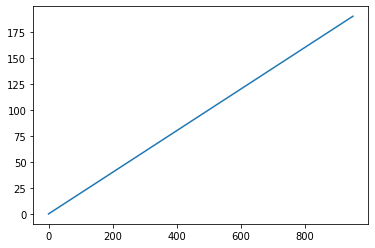

In [64]:
x = np.arange(0, 1000, 50)
y = np.arange(0, 200, 10)
print("x", x)
print("y", y)
plt.plot(x, y) 

We can also do (r)ed d(o)ts 

x [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
y [82 72 31 70 70  0 51 94 67 85 24 74 29 32  1  5 44 57 53 73]


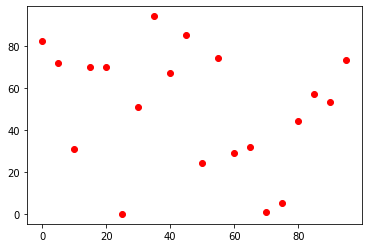

In [65]:
x = np.arange(0, 100, 5)
y = np.random.randint(0, 100, len(x))
print("x", x)
print("y", y)
plt.plot(x, y,'ro') 

Or (g)reen (x)s

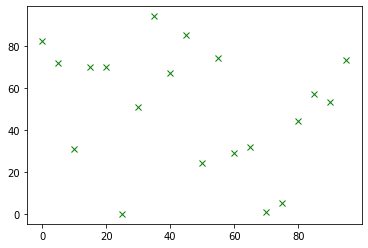

In [66]:
plt.plot(x, y,'gx') 

### Line Functions

When often define functions (which we can then plot as lines) in a format where we can take a value on the x axis, and use the function to determine the value on the y axis. For example

```y = 2x```

We would know that when `x = 2, y = 4` and when `x = 256, y = 512`, and so on. We can then plot these pairs as coordinates.



Above we saw the line 

```
y = x * 2
```

Previously we have only done maths with **single numbers**. Whats happening here?

Once you have generated arrays using methods like ```np.arange``` and ```np.random.randint```, you can then alter then using simple maths notatation. If ```a``` is an array, when we say ```a = a + 1```, we would add one to **every** item in the array. When we say ```a = a * 2``` we would double **every** item in the array. 

This is something we'll end up doing alot, and doing it this way is **much cleaner** and **much more efficient** than using a ``for loop``

In [68]:
#Generate array of 0-9
a = np.arange(10)
print(a)
#Add 1 to every value
print(a + 1)
#Subract 2 from every value
print(a - 2)
#Multiply every value by 100
print(a * 100)

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[-2 -1  0  1  2  3  4  5  6  7]
[  0 100 200 300 400 500 600 700 800 900]


## Covid Data with Ploltly Express 

- Plotly is another interactive plotting librray in Python.
- Learn more at 
 - https://plotly.com/python/px-arguments/#plotly-express-works-with-columnoriented-matrix-or-geographic-data
 - https://plotly.com/python/plotly-fundamentals/

### Installing Plotly

In [92]:
import sys
!{sys.executable} -m pip install numpy

### Exploring Plotly

In [72]:
import plotly.graph_objects as go
import plotly.express as px

In [103]:
fig = px.bar(df_countries.head(50), y='TotalConfirmed', x='Country', text='TotalConfirmed', color='Country')
fig

-  For more ideas around plotting covid data with plotly refer to https://www.analyticsvidhya.com/blog/2021/05/visualizing-covid-data-with-plotly/

In [96]:
df_countries.head(10)

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,48dfed97-2334-498c-b1bb-02c96e2317fd,Afghanistan,AF,afghanistan,0,180864,0,7709,0,0,2022-06-13T05:28:15.704Z,{}
1,644964b7-f36c-4790-a89e-e219e8e6436d,Albania,AL,albania,41,276731,0,3497,0,0,2022-06-13T05:28:15.704Z,{}
2,9a9aab62-9a41-4e2f-a892-742b288720bf,Algeria,DZ,algeria,2,265927,0,6875,0,0,2022-06-13T05:28:15.704Z,{}
3,bbc359e2-4baf-4d5a-95be-a23ae10905e4,Andorra,AD,andorra,0,43224,0,153,0,0,2022-06-13T05:28:15.704Z,{}
4,26a5c7a9-ba7b-4a99-ace3-f9d077e26ee6,Angola,AO,angola,0,99761,0,1900,0,0,2022-06-13T05:28:15.704Z,{}
5,2782ea2e-f027-4ae4-846d-20ae4e4fad31,Antarctica,AQ,antarctica,0,11,0,0,0,0,2022-06-13T05:28:15.704Z,{}
6,9b61d17d-26bc-453f-90d4-2b8b2e477238,Antigua and Barbuda,AG,antigua-and-barbuda,13,8492,0,140,0,0,2022-06-13T05:28:15.704Z,{}
7,8a83b8bf-a9d4-4178-8092-8fe49762e693,Argentina,AR,argentina,0,9276618,0,128973,0,0,2022-06-13T05:28:15.704Z,{}
8,6ea0f7dc-5e9a-41e4-b8bc-18c50e776b03,Armenia,AM,armenia,0,423006,0,8629,0,0,2022-06-13T05:28:15.704Z,{}
9,488dba25-75d3-4418-a806-0795a16a274e,Australia,AU,australia,16393,7614107,24,9048,0,0,2022-06-13T05:28:15.704Z,{}


### Sorting 

- Sorting the dataframe from highest number of Total Confirmed cases to the lowest.
- ```.sort_values``` is a pandas function for sorting a data frame. 
- More here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [104]:
sorted_countries = df_countries.sort_values(by=['TotalConfirmed'], ascending=False)
sorted_countries.head(10)

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
186,727a5f73-22c8-4974-94c0-43d6e7f89e08,United States of America,US,united-states,32160,85500976,96,1011260,0,0,2022-06-13T05:28:15.704Z,{}
77,36e67038-d4df-4698-bba3-ab1d00b311ca,India,IN,india,8582,43222017,4,524761,0,0,2022-06-13T05:28:15.704Z,{}
24,6a119ee9-9b72-41e4-a586-1b753636cb8a,Brazil,BR,brazil,27796,31445137,114,668074,0,0,2022-06-13T05:28:15.704Z,{}
60,c8b47d0c-3da0-4c08-9273-6be054ea3e4c,France,FR,france,0,29946603,0,149788,0,0,2022-06-13T05:28:15.704Z,{}
64,80936961-0cff-4363-928b-26f0006f39d0,Germany,DE,germany,0,26803867,0,139806,0,0,2022-06-13T05:28:15.704Z,{}
185,8083c742-74a0-4f91-90bf-1beccd5994d3,United Kingdom,GB,united-kingdom,0,22571880,0,179884,0,0,2022-06-13T05:28:15.704Z,{}
91,5eb6c1fd-7fe3-4de4-84a9-066c00c8f242,Korea (South),KR,korea-south,3828,18229288,17,24388,0,0,2022-06-13T05:28:15.704Z,{}
144,49651f97-2432-4dfe-a8e3-7a44cdbab67f,Russian Federation,RU,russia,3572,18104944,71,372276,0,0,2022-06-13T05:28:15.704Z,{}
83,9bad04bc-60e9-4b41-9804-47739dbf065f,Italy,IT,italy,22458,17634065,60,167365,0,0,2022-06-13T05:28:15.704Z,{}
181,96bf2dd4-d9c3-4a69-a5da-35642d21134d,Turkey,TR,turkey,0,15072747,0,98965,0,0,2022-06-13T05:28:15.704Z,{}


- Plotting the top 50 countries with the highest number of Total Confirmed cases.

In [105]:
fig = px.bar(sorted_countries.head(50), y='TotalConfirmed', x='Country', text='TotalConfirmed', color='Country')
fig